# Rahul Raj 15EE35006

# Term paper on 'Band Sparse matrix based FDM to calculate Capacitance'

In [16]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import constants

In [17]:
epsilon = constants.value(u'electric constant')
dielectric_constant = 5
l = 0.06  #Input length of capacitor
g = 0.00162 #Input gap between plates
w = 0.01  #Input width of capacitor
n_x = 7  #No. of nodes in horizontal direction 
n_y = 7  #No. of nodes in vertical direction
V_l = 5  #Voltage at left plate
V_r = -5  #Voltage at right plate

In [18]:
#Defining Band Sparse Matrix
dx = l/(n_x-1)
dy = g/(n_y-1)
k1 = (dx*dx)
k2 = (dy*dy)
k3 = k1+k2
print(k1, k2)
s_row = (n_y-2)*(n_y-2)
s_col = (n_x-2)*(n_x-2)
S = np.zeros((s_row, s_col))
for i in range (s_row):
    for j in range (i, s_col):
        if (i==j):
            S[i][j]=-2
            if (j+1 < s_col):
                S[i][j+1]=k1/k3
            if (j+5 < s_col):
                S[i][j+5]=k2/k3
        if (i%5==4 and j%5==0):
            S[i][j]=0
        S[j][i]=S[i][j]
S[0][0] = -4
S[0][n_x-2] = k2/k3
pd.DataFrame(S).to_csv("sparse.csv")
print(S)

0.0001 7.29e-08
[[ -4.00000000e+00   9.99271531e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   7.28468946e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99271531e-01  -2.00000000e+00   9.99271531e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   7.28468946e-04   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   9.99271531e-01  -2.00000000e+00   9.99271531e-01
    0.00000000e+00   0.00000000e+0

In [19]:
#Checking symmetric nature of Band matrix
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
check_symmetric(S)

True

In [20]:
#Forming fixed node voltage matrix
B = np.zeros((s_row,1))
for i in range(s_row):
    if (i%(n_y-2)==0):
        B[i][0]=-5*(k1/k3)
    if (i%(n_y-2)==(n_y-3)):
        B[i][0]=5*(k1/k3)
print(B)

[[-4.99635766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 4.99635766]
 [-4.99635766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 4.99635766]
 [-4.99635766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 4.99635766]
 [-4.99635766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 4.99635766]
 [-4.99635766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 4.99635766]]


In [21]:
#Calculating free node volatges
from numpy.linalg import inv
S_inverse = inv(S)
print(S_inverse)
v = np.dot(S_inverse, B)
v.shape
print(v)
v_2D = np.reshape(v, (-1, 5))
print(v_2D)
check_symmetric(S_inverse)
pd.DataFrame(v_2D).to_csv("free-vol.csv")

[[ -3.12273406e-01  -2.49274911e-01  -1.86639420e-01  -1.24275605e-01
   -6.20926329e-02  -4.14797612e-04  -6.02552021e-04  -6.09462432e-04
   -4.81200066e-04  -2.63041335e-04  -9.11166224e-07  -1.52127176e-06
   -1.69433196e-06  -1.42556102e-06  -8.08070820e-07  -2.34247916e-09
   -4.02412891e-09  -4.60263085e-09  -3.95266634e-09  -2.26922298e-09
   -6.25870521e-12  -1.08188683e-11  -1.24612153e-11  -1.07664129e-11
   -6.20581421e-12]
 [ -2.49274911e-01  -9.97825763e-01  -7.47101039e-01  -4.97464074e-01
   -2.48551183e-01  -1.05407214e-03  -1.92795764e-03  -2.07723553e-03
   -1.68490129e-03  -9.32368846e-04  -2.84192554e-06  -4.91957046e-06
   -5.59889742e-06  -4.77207184e-06  -2.72390138e-06  -7.60756983e-09
   -1.31544528e-08  -1.51341223e-08  -1.30542312e-08  -7.51450704e-09
   -2.05047984e-11  -3.54935745e-11  -4.09445040e-11  -3.54223555e-11
   -2.04353182e-11]
 [ -1.86639420e-01  -7.47101039e-01  -1.30865026e+00  -8.71376442e-01
   -4.35371331e-01  -1.21087602e-03  -2.28745472e-

In [22]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
check_symmetric(S_inverse)

True

In [23]:
V = np.zeros((n_x, n_y))
for i in range (n_x):
    for j in range (n_y):
        if (j==0):
            V[i][j]=V_l
        if (j==(n_x-1)):
            V[i][j]=V_r
        if (i>0 and i<n_y-1) and (j>0 and j<n_x-1):
            V[i][j] = v_2D[i-1][j-1]
pd.DataFrame(V).to_csv("all-vol.csv")
print(V)

[[  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   1.25075137e+00   4.22467005e-03  -1.24350794e+00
   -2.49305062e+00  -3.74501084e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33056832e+00   1.66265081e+00  -4.06061791e-03
   -1.66987145e+00  -3.33508450e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33332726e+00   1.66665653e+00  -1.12886937e-05
   -1.66667616e+00  -3.33333872e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33333194e+00   1.66666536e+00  -3.06655903e-08
   -1.66666542e+00  -3.33333197e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33131108e+00   1.66504922e+00  -8.30235533e-11
   -1.66504922e+00  -3.33131108e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]]


In [24]:
#Calculating Electric Field
h = g/(n_x-1)  #width for each square element
#Creating matrix for Electric field between nodes
E = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        E[i][j] = (V[i+1][j]-V[i+1][j+1])/h
pd.DataFrame(E).to_csv("field-band.csv")
print(E)

[[ 13886.10605243   4616.76553996   4621.23188395   4627.93586315
    4636.8896836    4648.10801395]
 [  6183.08029751   6177.47224088   6173.00530572   6169.66973114
    6167.45577463   6166.35368716]
 [  6172.86199769   6172.85456119   6172.84376962   6172.83286682
    6172.82426857   6172.81957314]
 [  6172.84465249   6172.83918352   6172.83479608   6172.83476577
    6172.83910049   6172.84453869]
 [  6180.32931845   6171.34023484   6166.84896554   6166.84896545
    6171.34023462   6180.32931814]]


In [25]:
#Calculating Flux Density
epsilon_r = epsilon*dielectric_constant  #permittivity of medium between plates
#Creating matrix for Flux Density between nodes
D = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        D[i][j] = E[i][j]*epsilon_r
print(D)

[[  6.14750955e-07   2.04388546e-07   2.04586275e-07   2.04883067e-07
    2.05279461e-07   2.05776107e-07]
 [  2.73730771e-07   2.73482497e-07   2.73284742e-07   2.73137073e-07
    2.73039059e-07   2.72990268e-07]
 [  2.73278397e-07   2.73278068e-07   2.73277591e-07   2.73277108e-07
    2.73276727e-07   2.73276519e-07]
 [  2.73277630e-07   2.73277387e-07   2.73277193e-07   2.73277192e-07
    2.73277384e-07   2.73277625e-07]
 [  2.73608983e-07   2.73211028e-07   2.73012195e-07   2.73012195e-07
    2.73211028e-07   2.73608983e-07]]


In [26]:
#Calculating Total Flux
Total_Flux = D[2][2]
print(Total_Flux)

2.73277590525e-07


In [27]:
#Calculating Charge
Area = l*w
Q = Total_Flux*Area
print(Q)

1.63966554315e-10


In [28]:
#Calculating Capacitance
C = Q/(V_l-V_r)
print(C)

1.63966554315e-11


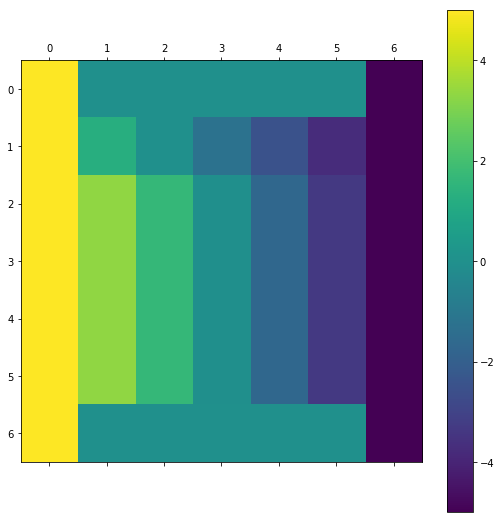

In [29]:
#Plot Voltage Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(V)
plt.colorbar()

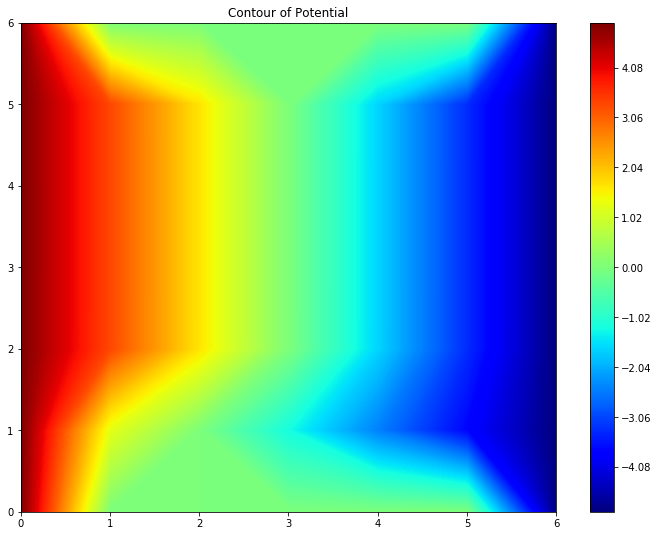

In [31]:
#Contour of Potential
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=lenY=7
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Potential")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()